# Alphas Plots for Regularized Regression

This is a development notebook to explore the use of alpha plots for regularized regression.

In [1]:
%matplotlib inline

In [2]:
import os 
import sys
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append("../..")
import yellowbrick as yb

## Data Loading

In [3]:
## The path to the test data sets
FIXTURES  = os.path.join(os.getcwd(), "..", "data")

## Dataset loading mechanisms
datasets = {
    "credit": os.path.join(FIXTURES, "credit", "credit.csv"),
    "concrete": os.path.join(FIXTURES, "concrete", "concrete.csv"),
    "occupancy": os.path.join(FIXTURES, "occupancy", "occupancy.csv"),
}


def load_data(name):
    """
    Loads and wrangles the passed in dataset by name.
    If download is specified, this method will download any missing files. 
    """
    
    # Get the path from the datasets 
    path = datasets[name]
    
    # Check if the data exists, otherwise download or raise 
    if not os.path.exists(path):
            raise ValueError((
                "'{}' dataset has not been downloaded, "
                "use the download.py module to fetch datasets"
            ).format(name))
        
    
    # Return the data frame
    return pd.read_csv(path)

In [4]:
# Load the data
df = load_data('concrete')
feature_names = ['cement', 'slag', 'ash', 'water', 'splast', 'coarse', 'fine', 'age']
target_name = 'strength'

# Get the X and y data from the DataFrame 
X = df[feature_names].as_matrix()
y = df[target_name].as_matrix() 

### Alphas Configuration

In [5]:
# Set the alphas 
alphas = np.logspace(-10, 0, 400)

## Ridge Regularization

### Manual Ridge 

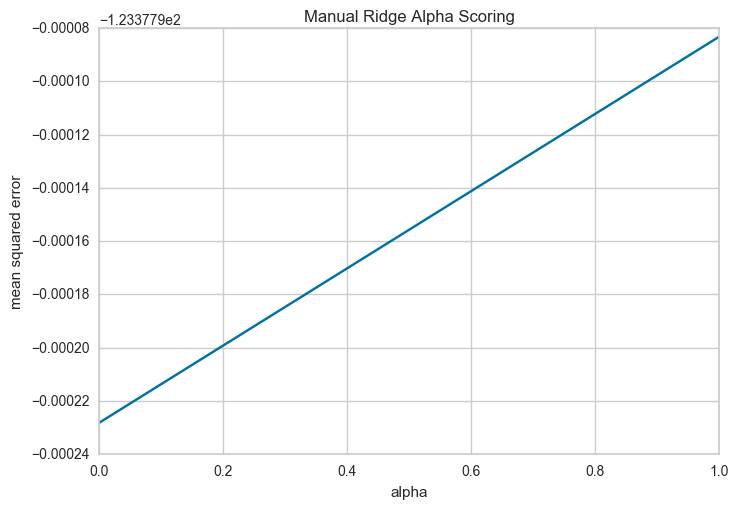

In [6]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

errors = []
for alpha in alphas:
    model = Ridge(alpha=alpha)
    score = cross_val_score(model, X, y, cv=12, scoring='neg_mean_squared_error')
    errors.append(score.mean())

plt.plot(alphas, errors, label='ridge')
plt.xlabel('alpha')
plt.ylabel('mean squared error')
plt.title("Manual Ridge Alpha Scoring")
plt.show()

## Ridge CV

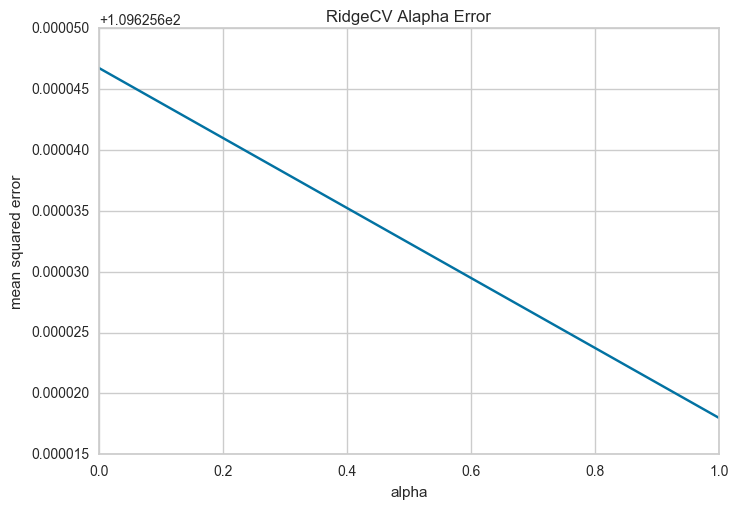

In [7]:
from sklearn.linear_model import RidgeCV 

# Must pass store_cv_values=True in order to store the MSE of the alphas. 
ridge = RidgeCV(alphas=alphas, store_cv_values=True)
ridge.fit(X, y)

# cv_values_ : array, shape = [n_samples, n_alphas] or shape = [n_samples, n_targets, n_alphas], optional
# Cross-validation values for each alpha (if store_cv_values=True and cv=None). 
# After fit() has been called, this attribute will contain the mean squared errors (by default) or the 
# values of the {loss,score}_func function (if provided in the constructor).
ridge.cv_values_.mean(0)

g = plt.plot(ridge.alphas, ridge.cv_values_.mean(0), label="ridge")
plt.xlabel("alpha")
plt.ylabel("mean squared error")
plt.title("RidgeCV Alapha Error")
plt.show()

## LASSO Regularization 

### Lasso CV

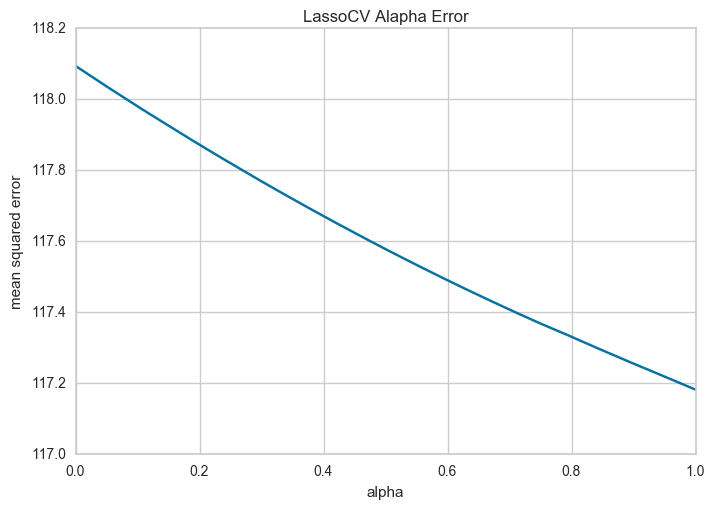

In [8]:
from sklearn.linear_model import LassoCV 

lasso = LassoCV(alphas=alphas)
lasso.fit(X, y)

# mse_path_ : array, shape (n_l1_ratio, n_alpha, n_folds)
# Mean square error for the test set on each fold, varying l1_ratio and alpha.

g = plt.plot(lasso.alphas_, lasso.mse_path_.mean(1), label="lasso")
plt.xlabel("alpha")
plt.ylabel("mean squared error")
plt.title("LassoCV Alapha Error")
plt.show()

### Lasso LARS CV

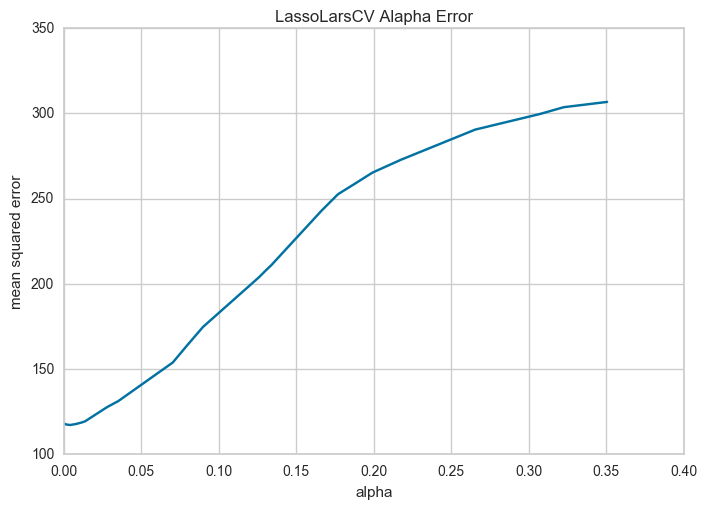

In [9]:
from sklearn.linear_model import LassoLarsCV 

larslasso = LassoLarsCV()
larslasso.fit(X, y)

# mse_path_ : array, shape (n_l1_ratio, n_alpha, n_folds)
# Mean square error for the test set on each fold, varying l1_ratio and alpha.

g = plt.plot(larslasso.cv_alphas_, larslasso.cv_mse_path_.mean(1), label="lasso lars")
plt.xlabel("alpha")
plt.ylabel("mean squared error")
plt.title("LassoLarsCV Alapha Error")
plt.show()

## ElasticNet Regularization

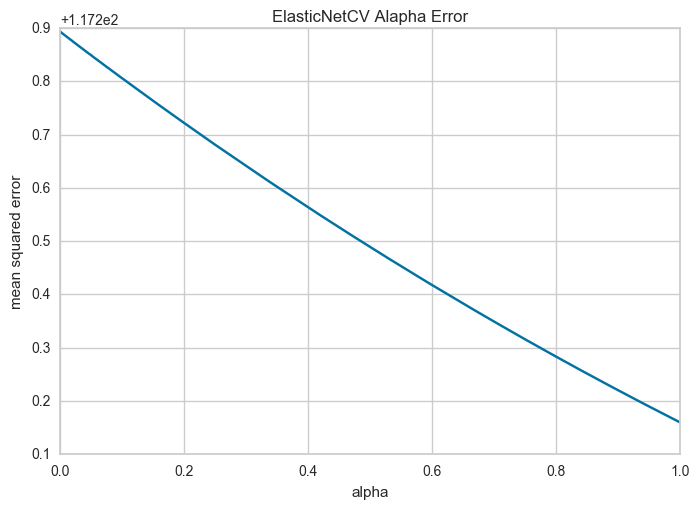

In [10]:
from sklearn.linear_model import ElasticNetCV 

enet = ElasticNetCV(alphas=alphas)
enet.fit(X, y)

g = plt.plot(enet.alphas_, enet.mse_path_.mean(1), label="elasticnet")
plt.xlabel("alpha")
plt.ylabel("mean squared error")
plt.title("ElasticNetCV Alapha Error")
plt.show()

## Plot All 

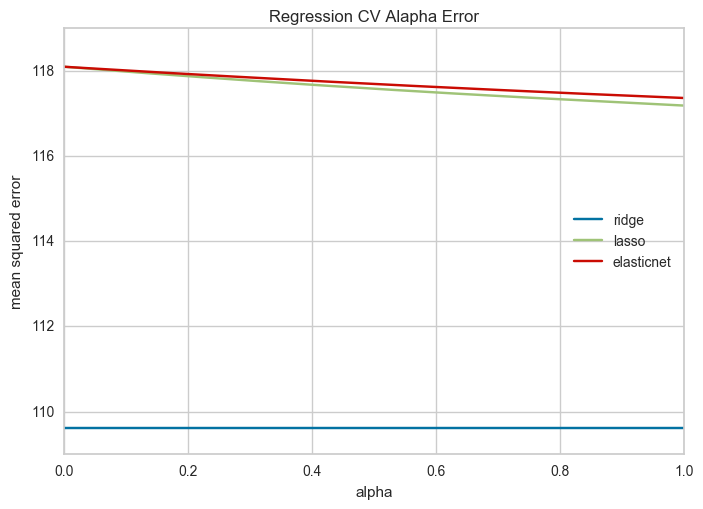

In [11]:
# Plot all 
plt.plot(ridge.alphas, ridge.cv_values_.mean(0), label="ridge")
plt.plot(lasso.alphas_, lasso.mse_path_.mean(1), label="lasso")
# plt.plot(larslasso.cv_alphas_, larslasso.cv_mse_path_.mean(1), label="lasso lars")
plt.plot(enet.alphas_, enet.mse_path_.mean(1), label="elasticnet")
plt.xlabel("alpha")
plt.ylabel("mean squared error")
plt.title("Regression CV Alapha Error")
plt.legend(loc='best')
plt.show()